<a href="https://colab.research.google.com/github/tnwlvos/machinelearning2/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-472158588.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('005930.KS', start='2020-01-01', end='2025-11-06')
[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0689
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0688e-04
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1000e-04
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6084e-04
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8848e-04
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6398e-04
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6955e-04
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1979e-04
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5610e-04
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1988e-04
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3845e-04
Epoch 13/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2158e-04
Epoch 14/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.1679e-04
Epoch 15/100
45/45 ━━━━━━━━━━━━━━━

/tmp/ipython-input-472158588.py:65: FutureWarning: YF.download() has changed argument auto_adjust default to True
  test_data = yf.download('005930.KS', start='2025-01-01', end='2025-10-31')
[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


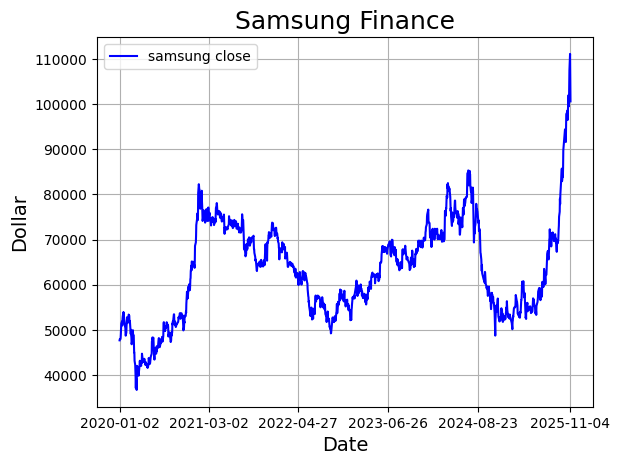

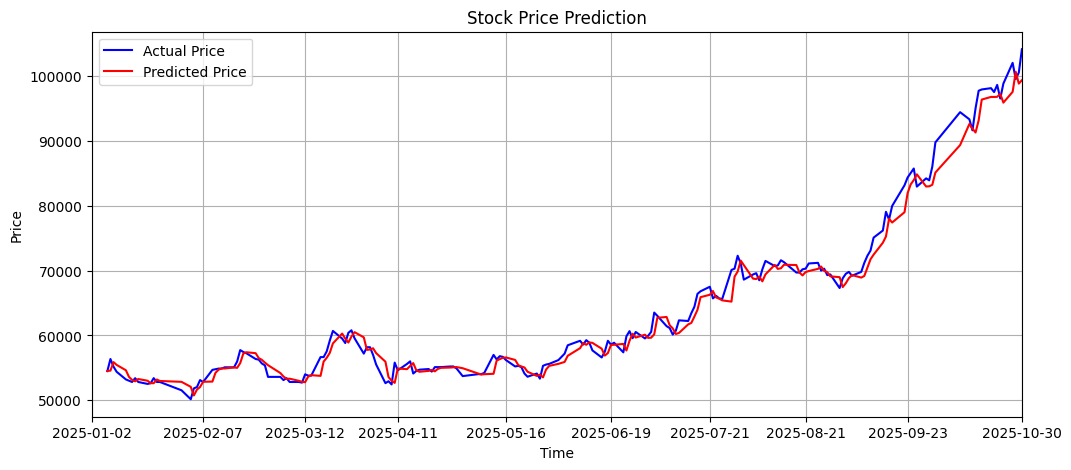

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
 예측 날짜: 2025-11-05  다음날
예측 종가: 100588.83 KRW


In [191]:
# !pip install yfinance
import yfinance as yf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Conv1D, LSTM, Dense
from keras.models import Sequential
from keras.layers import Dropout
# 예시: 삼성전자 (005930.KS)
data = yf.download('005930.KS', start='2020-01-01', end='2025-11-06')
# print(data)
data_close=np.array(data[['Close','Volume']])

# print(data_close,len(data_close))
date=data.index.date
# print(date)
xtick=np.arange(0,date.shape[0],int(date.shape[0]/5))

plt.figure(1)
plt.plot(date,data_close[:,0],label="samsung close",color="blue")
plt.xticks(date[xtick])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Dollar',fontsize=14)
plt.title('Samsung Finance',fontsize=18)
plt.grid()
plt.legend()



max_close = np.max(data_close[:,0])
max_volume = np.max(data_close[:,1])
min_close=np.min(data_close[:,0])
min_volume=np.min(data_close[:,1])


data_norm=np.copy(data_close)

#min-max 정규화
data_norm[:,0]=(data_norm[:,0]-min_close)/(max_close-min_close)
data_norm[:,1]=(data_norm[:,1]-min_volume)/(max_volume-min_volume)


#최대값으로 나눈 정규화
# data_norm[:,0]/=max_close
# data_norm[:,1]/=max_volume


window_size=3
x_train=[]
t_train=[]
for i in range(len(data_norm)-window_size):
  x_train.append(data_norm[i:i+window_size,:])
  t_train.append(data_norm[i+window_size,0])
x_train=np.array(x_train)
t_train=np.array(t_train)


model=keras.models.Sequential()
model.add(keras.layers.LSTM(128,activation='tanh',input_shape=(window_size,2)))
# model.add(keras.layers.RNN(units=64))
model.add(keras.layers.Dense(1))
# model = Sequential([
#     Conv1D(128, kernel_size=3, activation='relu', input_shape=(window_size,2)),
#     LSTM(64, activation='tanh'),

#     Dense(1)
# ])
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse')
history =model.fit(x_train,t_train,epochs=100)

# 예시: 삼성전자 (005930.KS)
test_data = yf.download('005930.KS', start='2025-01-01', end='2025-10-31')
# print(data)
test_data_close=np.array(test_data[['Close','Volume']])
# print(data_close,len(data_close))
test_date=test_data.index.date

xtick_test=np.arange(0,test_date.shape[0],int(test_date.shape[0]/9))
test_norm = np.copy(test_data_close)
#min-max 정규화
test_norm[:,0]=(test_norm[:,0]-min_close)/(max_close-min_close)
test_norm[:,1]=(test_norm[:,1]-min_volume)/(max_volume-min_volume)


#최대값으로 나눈 정규화
# test_norm[:,0]/=max_close
# test_norm[:,1]/=max_volume



x_test=[]
t_test=[]
for i in range(len(test_norm)-window_size):
  x_test.append(test_norm[i:i+window_size,:])
  t_test.append(test_norm[i+window_size,0])

x_test=np.array(x_test)
t_test=np.array(t_test)

pred_test=model.predict(x_test)

valid_date = test_date[window_size:]

# min-max 복구 (inverse transform)
t_test_real = t_test * (max_close - min_close) + min_close
pred_test_real = pred_test * (max_close - min_close) + min_close

#max 복구
# t_test_real =t_test*max_close
# pred_test_real=pred_test*max_close


plt.figure(figsize=(12,5))
plt.plot(valid_date,t_test_real, label='Actual Price', color='blue')
plt.plot(valid_date,pred_test_real, label='Predicted Price', color='red')

plt.title('Stock Price Prediction')
plt.xticks(test_date[xtick_test])
plt.xlabel('Time')
plt.ylabel('Price')
plt.xlim(test_date[0],test_date[-1])
plt.legend()
plt.grid()
plt.show()

# # --- 3️⃣ 입력 구성 (최근 window_size=3일) ---

x_input = data_norm[-window_size:]      # 마지막 3일
x_input = np.expand_dims(x_input, axis=0)  # (1, 3, 2) 형태로 변환

# --- 4️⃣ 예측 ---
pred_next = model.predict(x_input)
# predicted_close = pred_next[0][0] * max_close  # 정규화 복원
predicted_close = pred_next[0][0] * (max_close - min_close) + min_close
# --- 5️⃣ 결과 출력 ---
print(f" 예측 날짜: {data.index[-1].date()}  다음날")
print(f"예측 종가: {predicted_close:.2f} KRW")


from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


# t_test: 실제값
# pred_test: 예측값
# 둘 다 복원된 실제 단위 (KRW)



# 예측값과 실제값이 복원된 상태여야 함 (예: KRW 단위)
# t_test_real : 실제 종가
# pred_test_real : 예측 종가

# 1️⃣ RMSE
rmse = np.sqrt(mean_squared_error(t_test_real, pred_test_real))

# 2️⃣ MAPE
mape = np.mean(np.abs((t_test_real - pred_test_real) / np.maximum(t_test_real, 1e-8))) * 100

# 3️⃣ R² (결정계수)
r2 = r2_score(t_test_real, pred_test_real)

# 결과 출력
print("📊 평가 지표 요약")
print(f"RMSE  : {rmse:.2f}")
print(f"MAPE  : {mape:.2f}%")
print(f"R²    : {r2:.5f}")

